# The Happiness ~Project~ Linear Regression

The goal of this project is to conduct an exploratory analysis of two datasets (one related to economic freedom, and one related to world happiness) and train a linear regression model to draw conclusions about their relationships. 

Datasets available here:

https://www.kaggle.com/gsutters/economic-freedom

https://www.kaggle.com/unsdsn/world-happiness


Work Plan:

Impute missing values in economic_freedom dataset

Use feature extraction to determine the most relevant features in the economic_freedom dataset

Merge those features into the world_happiness dataset

Create pipeline for world_happiness dataset

### Importing Datasets and Relevant Packages

First, we import python packages and check data types in our economic freedom dataset. We also generate a data preview and check summary statistics for each variable.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.set_printoptions(suppress=True, linewidth=200)

df0 = pd.read_csv('economic_freedom_2016.csv')
df = df0.copy()

print(df.dtypes)
df

year                                    int64
ISO_code                               object
countries                              object
ECONOMIC FREEDOM                      float64
rank                                    int64
quartile                                int64
1a_government_consumption             float64
1b_transfers                          float64
1c_gov_enterprises                    float64
1d_top_marg_tax_rate                  float64
1_size_government                     float64
2a_judicial_independence              float64
2b_impartial_courts                   float64
2c_protection_property_rights         float64
2d_military_interference              float64
2e_integrity_legal_system             float64
2f_legal_enforcement_contracts        float64
2g_restrictions_sale_real_property    float64
2h_reliability_police                 float64
2i_business_costs_crime               float64
2j_gender_adjustment                  float64
2_property_rights                 

,year,ISO_code,countries,ECONOMIC FREEDOM,rank,quartile,1a_government_consumption,1b_transfers,1c_gov_enterprises,1d_top_marg_tax_rate,...,3_sound_money,4a_tariffs,4b_regulatory_trade_barriers,4c_black_market,4d_control_movement_capital_ppl,4_trade,5a_credit_market_reg,5b_labor_market_reg,5c_business_reg,5_regulation
0,2016,ALB,Albania,7.54,34,1,8.232353,7.509902,8.0,8.0,...,9.553657,8.963556,7.489905,10.00000,6.406138,8.214900,7.098562,6.916278,6.705863,6.906901
1,2016,DZA,Algeria,4.99,159,4,2.150000,7.817129,0.0,4.5,...,7.253894,6.872533,2.481294,5.56391,1.590362,4.127025,5.100509,5.029513,5.676956,5.268992
2,2016,AGO,Angola,5.17,155,4,7.600000,8.886739,0.0,9.5,...,5.606605,6.989244,2.024949,10.00000,2.044823,5.264754,7.064905,4.560325,4.930271,5.518500
3,2016,ARG,Argentina,4.84,160,4,5.335294,6.048930,6.0,4.0,...,5.614336,6.421600,4.811105,0.00000,4.697482,3.982547,5.419820,5.151405,5.535831,5.369019
4,2016,ARM,Armenia,7.57,29,1,7.264706,7.748532,8.0,5.0,...,9.521940,8.547556,7.194410,10.00000,6.830998,8.143241,9.102046,6.234630,6.797530,7.378069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,2016,VEN,Venezuela,2.88,162,4,6.985294,5.773842,0.0,6.0,...,1.942101,7.467156,1.964154,0.00000,3.693936,3.281311,3.333333,2.107446,2.009841,2.483540
158,2016,VNM,Vietnam,6.42,112,3,9.214706,NaN,NaN,6.0,...,6.468943,7.556267,5.308908,10.00000,2.239655,6.276207,8.953395,5.254315,5.896365,6.701358
159,2016,YEM,"Yemen, Rep.",6.34,117,3,8.514706,9.020396,4.0,9.0,...,9.044078,8.430000,4.811525,10.00000,3.493863,6.683847,5.000000,6.522810,4.159381,5.227397
160,2016,ZMB,Zambia,6.61,97,3,4.758824,10.000000,4.0,5.5,...,8.262901,5.330267,3.850721,10.00000,8.707999,6.972247,7.516937,5.545248,6.174719,6.412301


In [2]:
df.describe()

,year,ECONOMIC FREEDOM,rank,quartile,1a_government_consumption,1b_transfers,1c_gov_enterprises,1d_top_marg_tax_rate,1_size_government,2a_judicial_independence,...,3_sound_money,4a_tariffs,4b_regulatory_trade_barriers,4c_black_market,4d_control_movement_capital_ppl,4_trade,5a_credit_market_reg,5b_labor_market_reg,5c_business_reg,5_regulation
count,162.0,162.000000,162.000000,162.000000,162.000000,151.000000,157.000000,162.000000,162.000000,152.000000,...,162.000000,161.000000,162.000000,161.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,2016.0,6.795062,81.271605,2.506173,5.596960,7.645666,6.286624,6.518519,6.483536,4.970565,...,8.242480,7.488990,5.813469,9.688139,5.115332,7.018193,8.218900,6.376231,6.453951,7.016361
std,0.0,0.886026,46.964242,1.121484,2.326263,2.062616,3.000109,2.251907,1.224554,2.095731,...,1.397196,1.214490,2.018340,1.459576,1.966935,1.179901,1.521187,1.370618,1.194332,1.029534
min,2016.0,2.880000,1.000000,1.000000,0.000000,2.010416,0.000000,1.000000,3.616782,0.216767,...,1.942101,3.253067,0.000000,0.000000,1.153850,2.877141,3.333333,2.107446,2.009841,2.483540
25%,2016.0,6.260000,41.250000,2.000000,4.122059,6.294547,4.000000,5.000000,5.661057,3.416050,...,7.204295,6.872533,4.330162,10.000000,3.906918,6.357209,7.409831,5.327888,5.798775,6.475321
50%,2016.0,6.905000,81.500000,2.500000,5.664706,8.134860,7.000000,6.750000,6.532028,4.589838,...,8.642177,7.747867,5.927875,10.000000,5.340803,7.168725,8.595759,6.469800,6.385088,7.059939
75%,2016.0,7.467500,121.750000,3.750000,7.328676,9.460934,8.000000,8.375000,7.410203,6.432579,...,9.396903,8.266133,7.597361,10.000000,6.619137,7.951622,9.385559,7.367177,7.245935,7.713811
max,2016.0,8.970000,162.000000,4.000000,10.000000,10.000000,10.000000,10.000000,9.528485,9.697464,...,9.922187,10.000000,9.728995,10.000000,9.233427,9.323969,10.000000,9.372956,9.272600,9.439828


Based on the 'count' row in each field above, it looks like we'll have some missing data to impute later. But for now we're going to look at a summary of the second data set.

In [3]:
wh = pd.read_csv('world_happiness_2016.csv')

In [4]:
wh

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789


### Basic Data Cleaning

In [5]:
wh.describe()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


After reading in the economic_freedom_2016 csv file, it looks like the column titles could be clearer and easier to understand. Below we rename those based on the descriptions found here:

https://www.fraserinstitute.org/sites/default/files/human-freedom-index-2016.pdf

Also, there are a few columns that provide no relavent data ('year', 'ISO_code', 'quartile', 'rank'), so we're going to drop those.

In [6]:
del df['year']
del df['ISO_code']
del df['quartile']
del df['rank']

In [7]:
df.head()

,countries,ECONOMIC FREEDOM,1a_government_consumption,1b_transfers,1c_gov_enterprises,1d_top_marg_tax_rate,1_size_government,2a_judicial_independence,2b_impartial_courts,2c_protection_property_rights,...,3_sound_money,4a_tariffs,4b_regulatory_trade_barriers,4c_black_market,4d_control_movement_capital_ppl,4_trade,5a_credit_market_reg,5b_labor_market_reg,5c_business_reg,5_regulation
0,Albania,7.54,8.232353,7.509902,8.0,8.0,7.935564,2.668222,3.145462,4.512228,...,9.553657,8.963556,7.489905,10.00000,6.406138,8.214900,7.098562,6.916278,6.705863,6.906901
1,Algeria,4.99,2.150000,7.817129,0.0,4.5,3.616782,4.186704,4.327113,4.689952,...,7.253894,6.872533,2.481294,5.56391,1.590362,4.127025,5.100509,5.029513,5.676956,5.268992
2,Angola,5.17,7.600000,8.886739,0.0,9.5,6.496685,1.843129,1.974566,2.512364,...,5.606605,6.989244,2.024949,10.00000,2.044823,5.264754,7.064905,4.560325,4.930271,5.518500
3,Argentina,4.84,5.335294,6.048930,6.0,4.0,5.346056,3.689690,2.930563,4.255995,...,5.614336,6.421600,4.811105,0.00000,4.697482,3.982547,5.419820,5.151405,5.535831,5.369019
4,Armenia,7.57,7.264706,7.748532,8.0,5.0,7.003310,3.867379,4.197569,5.664317,...,9.521940,8.547556,7.194410,10.00000,6.830998,8.143241,9.102046,6.234630,6.797530,7.378069


In [8]:
df.columns

Index(['countries', 'ECONOMIC FREEDOM', '1a_government_consumption',
       '1b_transfers', '1c_gov_enterprises', '1d_top_marg_tax_rate',
       '1_size_government', '2a_judicial_independence', '2b_impartial_courts',
       '2c_protection_property_rights', '2d_military_interference',
       '2e_integrity_legal_system', '2f_legal_enforcement_contracts',
       '2g_restrictions_sale_real_property', '2h_reliability_police',
       '2i_business_costs_crime', '2j_gender_adjustment', '2_property_rights',
       '3a_money_growth', '3b_std_inflation', '3c_inflation',
       '3d_freedom_own_foreign_currency', '3_sound_money', '4a_tariffs',
       '4b_regulatory_trade_barriers', '4c_black_market',
       '4d_control_movement_capital_ppl', '4_trade', '5a_credit_market_reg',
       '5b_labor_market_reg', '5c_business_reg', '5_regulation'],
      dtype='object')

In [9]:
df.columns = ['Country', 'Economic Freedom', 'Govt Cons', 'Transfers', 'Govt Enterprise', 'Taxes', 'Govt Size Total',
              'Judicial Independence', 'Judicial Fairness', 'Property Protection', 'Military Interference', 'Legal Integrity',
              'Contract Strength', 'Property Freedom', 'Police Reliability', 'Crime Costs', 'Gender Adjustment',
             'Property Rights Total', 'Money Supply', 'Inflation STDV', 'Inflation', 'Currency Freedom', 'Currency Total', 
             'Tariffs', 'Trade Barriers', 'Black Market Size', 'Capital Controls', 'Trade Total', 'Credit Regulation', 
             'Labor Regulation', 'Business Regulation', 'Regulation Total']

In [10]:
df.loc[[df.loc[df['Country']=='Canada'].index[0],
        df.loc[df['Country']=='Iraq'].index[0],
        df.loc[df['Country']=='Russia'].index[0],
        df.loc[df['Country']=='United States'].index[0],
        df.loc[df['Country']=='Venezuela'].index[0]],:]

,Country,Economic Freedom,Govt Cons,Transfers,Govt Enterprise,Taxes,Govt Size Total,Judicial Independence,Judicial Fairness,Property Protection,...,Currency Total,Tariffs,Trade Barriers,Black Market Size,Capital Controls,Trade Total,Credit Regulation,Labor Regulation,Business Regulation,Regulation Total
27,Canada,7.98,3.923529,7.172716,8.0,5.0,6.024061,8.648412,6.388168,8.380740,...,9.579712,7.047600,7.922217,10.000000,6.747176,7.929248,9.712141,8.179867,7.652364,8.514791
69,Iraq,5.40,4.005882,7.986878,0.0,9.0,5.248190,NaN,3.000000,NaN,...,7.258295,9.733333,0.458580,9.612468,1.153850,5.239558,7.122456,6.469940,5.833445,6.475280
123,Russia,6.83,4.120588,5.229296,10.0,7.5,6.712471,4.197311,3.915076,4.320523,...,9.103570,6.937956,5.718176,10.000000,4.698155,6.838571,7.907104,5.513907,6.182900,6.534637
155,United States,8.03,6.714706,5.990629,8.0,5.0,6.426334,7.517065,7.287941,7.862137,...,9.847874,8.389111,8.368281,10.000000,3.855921,7.653328,9.333835,9.137464,8.011500,8.827600
157,Venezuela,2.88,6.985294,5.773842,0.0,6.0,4.689784,0.216767,0.641251,1.149376,...,1.942101,7.467156,1.964154,0.000000,3.693936,3.281311,3.333333,2.107446,2.009841,2.483540


As noted above in the datatypes, almost all columns are represented as float64. We want to change '3d_freedom_own_foreign_currency' (now titled 'Currency Freedom') to a float64 from an integer format.

In [11]:
df['Currency Freedom'] = df['Currency Freedom'].astype(float)

In [12]:
df.dtypes

Country                   object
Economic Freedom         float64
Govt Cons                float64
Transfers                float64
Govt Enterprise          float64
Taxes                    float64
Govt Size Total          float64
Judicial Independence    float64
Judicial Fairness        float64
Property Protection      float64
Military Interference    float64
Legal Integrity          float64
Contract Strength        float64
Property Freedom         float64
Police Reliability       float64
Crime Costs              float64
Gender Adjustment        float64
Property Rights Total    float64
Money Supply             float64
Inflation STDV           float64
Inflation                float64
Currency Freedom         float64
Currency Total           float64
Tariffs                  float64
Trade Barriers           float64
Black Market Size        float64
Capital Controls         float64
Trade Total              float64
Credit Regulation        float64
Labor Regulation         float64
Business R

Now that we have a smaller and clearer dataset, we want to identify missing values and impute missing data. There are several NaN values in the dataset that we want to impute. Below we check how many NaN values are in each feature.

In [13]:
# checks the total number of missing values in each feature
df.isnull().sum()

Country                   0
Economic Freedom          0
Govt Cons                 0
Transfers                11
Govt Enterprise           5
Taxes                     0
Govt Size Total           0
Judicial Independence    10
Judicial Fairness         0
Property Protection      10
Military Interference     0
Legal Integrity          25
Contract Strength         0
Property Freedom          2
Police Reliability       10
Crime Costs              10
Gender Adjustment         0
Property Rights Total     0
Money Supply              0
Inflation STDV            0
Inflation                 0
Currency Freedom          0
Currency Total            0
Tariffs                   1
Trade Barriers            0
Black Market Size         1
Capital Controls          0
Trade Total               0
Credit Regulation         0
Labor Regulation          0
Business Regulation       0
Regulation Total          0
dtype: int64

In [14]:
# Checks the total number of missing values in the dataset
df.isnull().sum().sum()

85

In [15]:
# Checks for the maximum number of missing values in any row.
max(df.isnull().sum(axis=1))

5

Given that we have 32 features in this dataset, it seems reasonable to keep all rows. If we choose to remove all rows with 5 NaN values, it would reduce our dataset from 162 rows to 158.

In [16]:
df.dropna(thresh=28)

,Country,Economic Freedom,Govt Cons,Transfers,Govt Enterprise,Taxes,Govt Size Total,Judicial Independence,Judicial Fairness,Property Protection,...,Currency Total,Tariffs,Trade Barriers,Black Market Size,Capital Controls,Trade Total,Credit Regulation,Labor Regulation,Business Regulation,Regulation Total
0,Albania,7.54,8.232353,7.509902,8.0,8.0,7.935564,2.668222,3.145462,4.512228,...,9.553657,8.963556,7.489905,10.00000,6.406138,8.214900,7.098562,6.916278,6.705863,6.906901
1,Algeria,4.99,2.150000,7.817129,0.0,4.5,3.616782,4.186704,4.327113,4.689952,...,7.253894,6.872533,2.481294,5.56391,1.590362,4.127025,5.100509,5.029513,5.676956,5.268992
2,Angola,5.17,7.600000,8.886739,0.0,9.5,6.496685,1.843129,1.974566,2.512364,...,5.606605,6.989244,2.024949,10.00000,2.044823,5.264754,7.064905,4.560325,4.930271,5.518500
3,Argentina,4.84,5.335294,6.048930,6.0,4.0,5.346056,3.689690,2.930563,4.255995,...,5.614336,6.421600,4.811105,0.00000,4.697482,3.982547,5.419820,5.151405,5.535831,5.369019
4,Armenia,7.57,7.264706,7.748532,8.0,5.0,7.003310,3.867379,4.197569,5.664317,...,9.521940,8.547556,7.194410,10.00000,6.830998,8.143241,9.102046,6.234630,6.797530,7.378069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,Venezuela,2.88,6.985294,5.773842,0.0,6.0,4.689784,0.216767,0.641251,1.149376,...,1.942101,7.467156,1.964154,0.00000,3.693936,3.281311,3.333333,2.107446,2.009841,2.483540
158,Vietnam,6.42,9.214706,NaN,NaN,6.0,7.607353,4.337770,4.115265,4.993180,...,6.468943,7.556267,5.308908,10.00000,2.239655,6.276207,8.953395,5.254315,5.896365,6.701358
159,"Yemen, Rep.",6.34,8.514706,9.020396,4.0,9.0,7.633775,2.508196,2.796220,3.252801,...,9.044078,8.430000,4.811525,10.00000,3.493863,6.683847,5.000000,6.522810,4.159381,5.227397
160,Zambia,6.61,4.758824,10.000000,4.0,5.5,6.064706,4.005429,3.812963,5.597120,...,8.262901,5.330267,3.850721,10.00000,8.707999,6.972247,7.516937,5.545248,6.174719,6.412301


In [17]:
# checks the total number of missing values in each feature of the World Happiness dataset
wh.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

The World Happiness dataset looks clean!

In [18]:
# This line would drop all rows or columns that contain nothing but missing values, it is not relevant to this dataset
df = df.dropna(how='all').dropna(how='all', axis='columns')

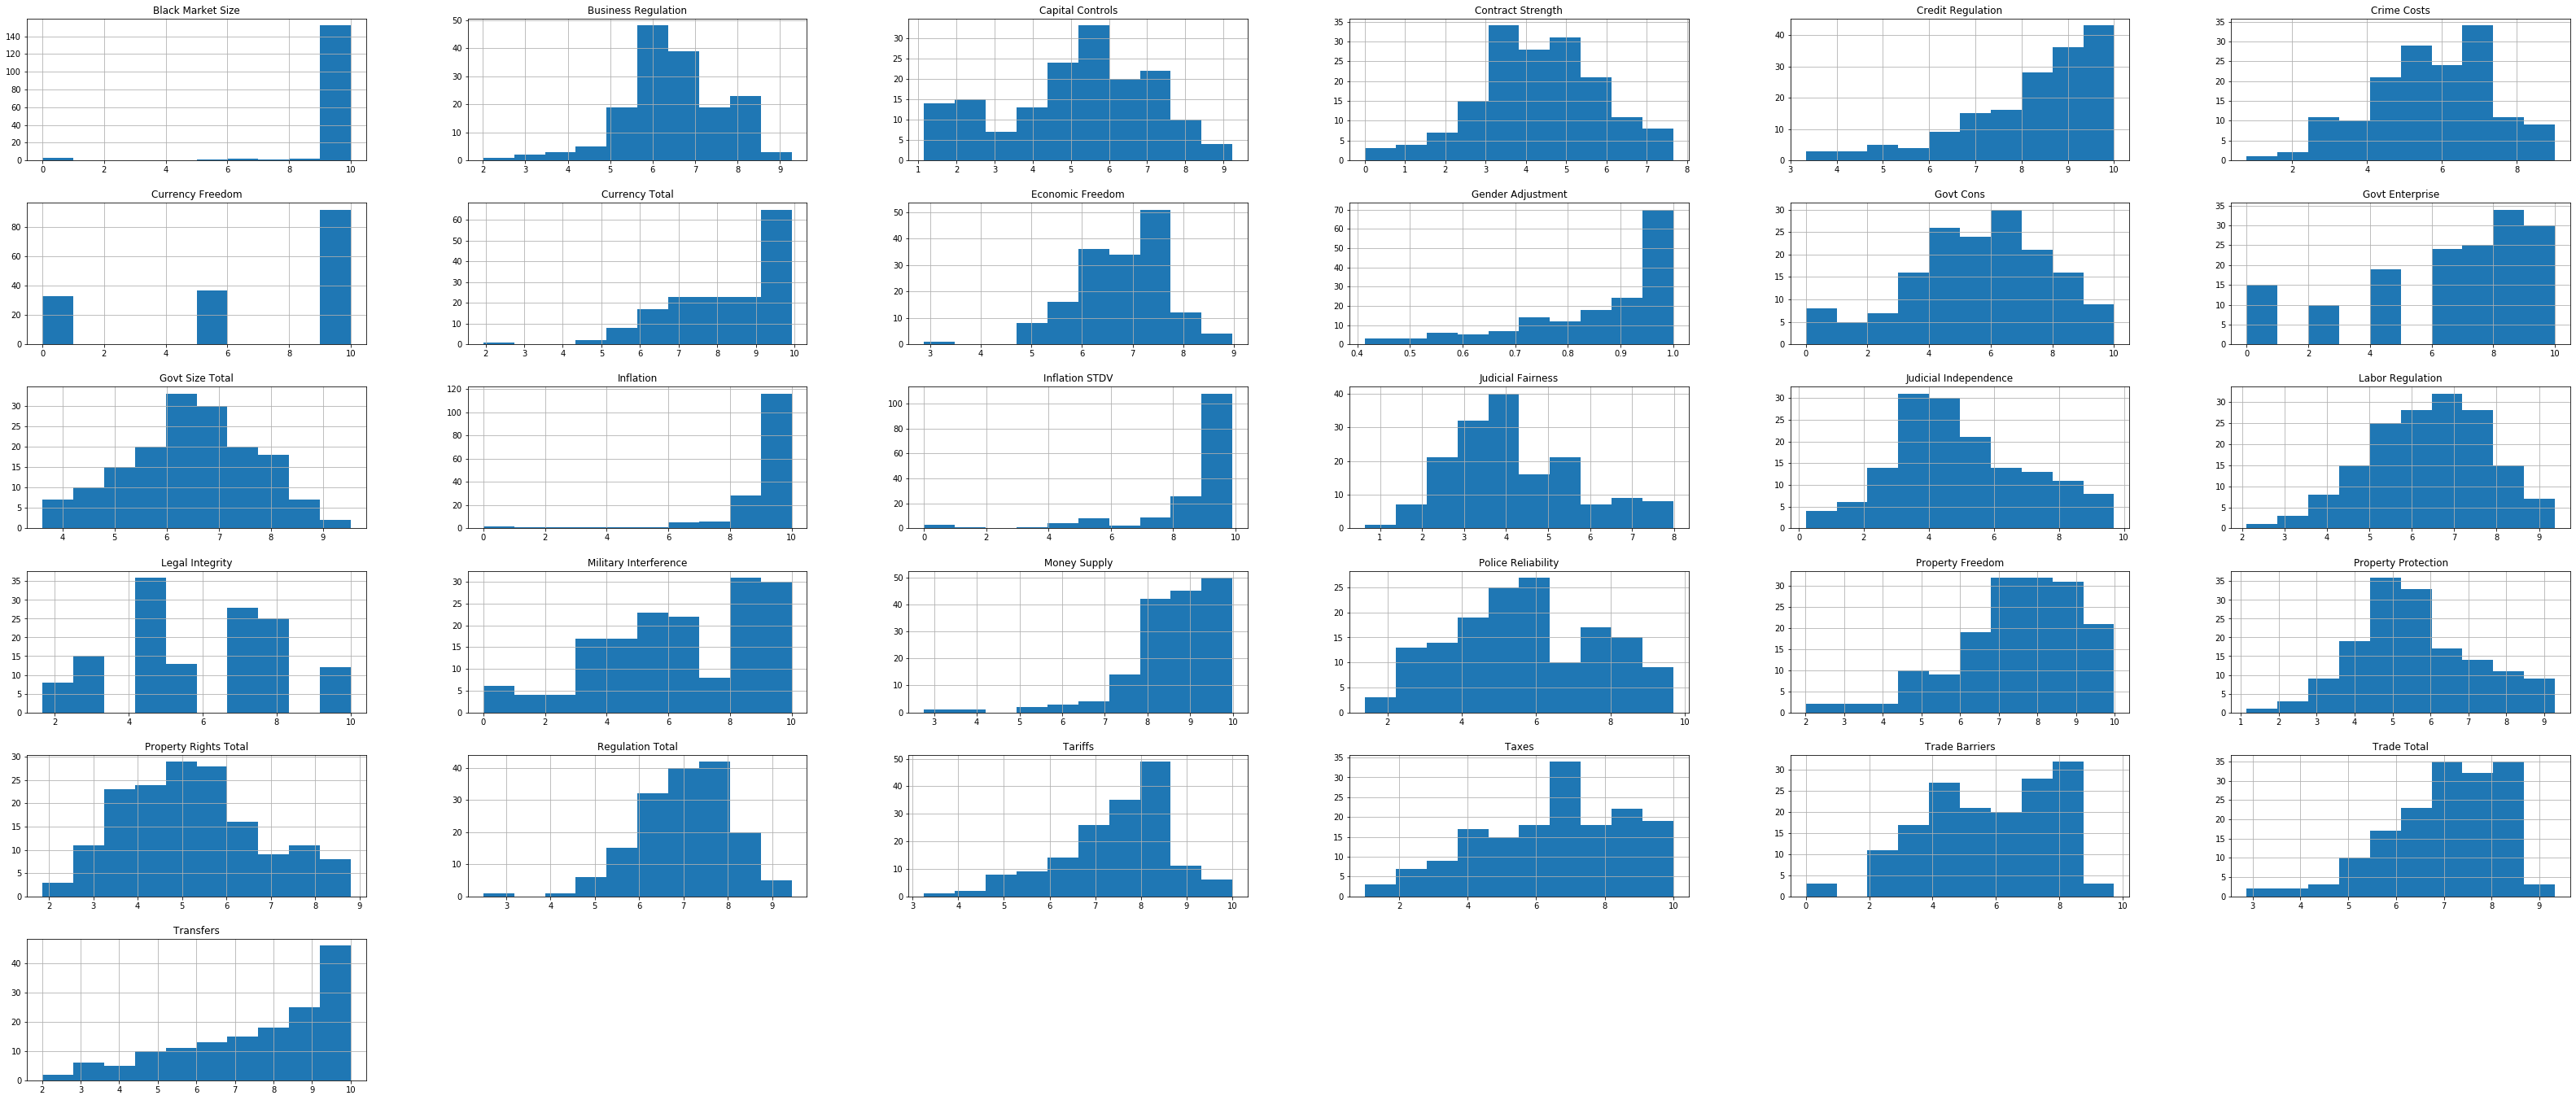

In [19]:
df.hist(bins=10, figsize=(56,24), layout=(6,-1))   
plt.show()

Looking at the histograms, it looks like some of our features are more ordinal than continuous. Currency Freedom describes countires as belonging to one of three groups. Government Enterprise and Black Market Size also are clearly not continuous or normally distributed. We will catagorize these as ordinal features in the sklearn pipeline process.

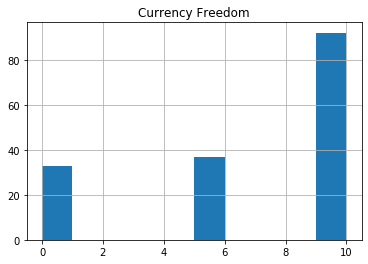

In [20]:
df.hist(column='Currency Freedom')
plt.show()

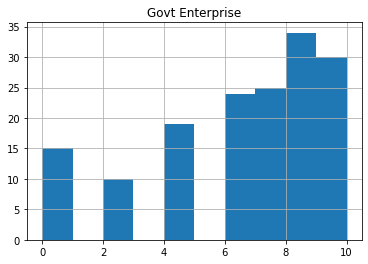

In [21]:
df.hist(column='Govt Enterprise')
plt.show()

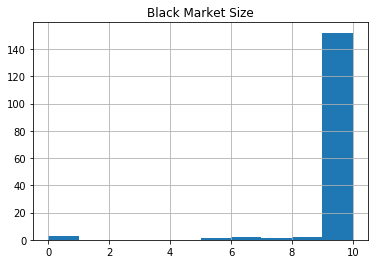

In [22]:
df.hist(column='Black Market Size')
plt.show()

### Joining Data and Cleaning Final Dataset

Below we perform an inner join on the economic dataset and the happiness dataset based on the country names in the first column. We use an inner join to only return countries with entries in each dataset.

In [23]:
dfinal = pd.merge(df,wh, on='Country', how='inner')

In [24]:
dfinal

,Country,Economic Freedom,Govt Cons,Transfers,Govt Enterprise,Taxes,Govt Size Total,Judicial Independence,Judicial Fairness,Property Protection,...,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Albania,7.54,8.232353,7.509902,8.0,8.0,7.935564,2.668222,3.145462,4.512228,...,4.655,4.546,4.764,0.95530,0.50163,0.73007,0.31866,0.05301,0.16840,1.92816
1,Algeria,4.99,2.150000,7.817129,0.0,4.5,3.616782,4.186704,4.327113,4.689952,...,6.355,6.227,6.483,1.05266,0.83309,0.61804,0.21006,0.16157,0.07044,3.40904
2,Angola,5.17,7.600000,8.886739,0.0,9.5,6.496685,1.843129,1.974566,2.512364,...,3.866,3.753,3.979,0.84731,0.66366,0.04991,0.00589,0.08434,0.12071,2.09459
3,Argentina,4.84,5.335294,6.048930,6.0,4.0,5.346056,3.689690,2.930563,4.255995,...,6.650,6.560,6.740,1.15137,1.06612,0.69711,0.42284,0.07296,0.10989,3.12985
4,Armenia,7.57,7.264706,7.748532,8.0,5.0,7.003310,3.867379,4.197569,5.664317,...,4.360,4.266,4.454,0.86086,0.62477,0.64083,0.14037,0.03616,0.07793,1.97864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,Uruguay,7.16,6.458824,5.899395,7.0,8.0,6.839555,7.645800,4.357137,6.473772,...,6.545,6.456,6.634,1.18157,1.03143,0.72183,0.54388,0.21394,0.18056,2.67139
131,Venezuela,2.88,6.985294,5.773842,0.0,6.0,4.689784,0.216767,0.641251,1.149376,...,6.084,5.973,6.195,1.13367,1.03302,0.61904,0.19847,0.08304,0.04250,2.97468
132,Vietnam,6.42,9.214706,NaN,NaN,6.0,7.607353,4.337770,4.115265,4.993180,...,5.061,4.991,5.131,0.74037,0.79117,0.66157,0.55954,0.11556,0.25075,1.94180
133,Zambia,6.61,4.758824,10.000000,4.0,5.5,6.064706,4.005429,3.812963,5.597120,...,4.795,4.645,4.945,0.61202,0.63760,0.23573,0.42662,0.11479,0.17866,2.58991


After performing an inner join on our two dataframes (Economic Freedom and World Happiness), we lost 27 rows from our Economic Freedom set and 22 from the World Happiness set. 

In [25]:
dfinal.isnull().sum().sum()

50

In [26]:
dfinal.dtypes

Country                           object
Economic Freedom                 float64
Govt Cons                        float64
Transfers                        float64
Govt Enterprise                  float64
Taxes                            float64
Govt Size Total                  float64
Judicial Independence            float64
Judicial Fairness                float64
Property Protection              float64
Military Interference            float64
Legal Integrity                  float64
Contract Strength                float64
Property Freedom                 float64
Police Reliability               float64
Crime Costs                      float64
Gender Adjustment                float64
Property Rights Total            float64
Money Supply                     float64
Inflation STDV                   float64
Inflation                        float64
Currency Freedom                 float64
Currency Total                   float64
Tariffs                          float64
Trade Barriers  

Now working with the joined dataset, we need to delete some summary or irrelevent columns and rename others for ease of use purposes.

In [27]:
del dfinal['Happiness Rank']
del dfinal['Lower Confidence Interval']
del dfinal['Upper Confidence Interval']
del dfinal['Dystopia Residual']

dfinal = dfinal.rename(columns={'Economy (GDP per Capita)': 'GDP per Capita', 'Health (Life Expectancy)': 'Life Expectancy',
                               'Trust (Government Corruption)': 'Govt Corruption'})

In [28]:
dfinal.dtypes

Country                   object
Economic Freedom         float64
Govt Cons                float64
Transfers                float64
Govt Enterprise          float64
Taxes                    float64
Govt Size Total          float64
Judicial Independence    float64
Judicial Fairness        float64
Property Protection      float64
Military Interference    float64
Legal Integrity          float64
Contract Strength        float64
Property Freedom         float64
Police Reliability       float64
Crime Costs              float64
Gender Adjustment        float64
Property Rights Total    float64
Money Supply             float64
Inflation STDV           float64
Inflation                float64
Currency Freedom         float64
Currency Total           float64
Tariffs                  float64
Trade Barriers           float64
Black Market Size        float64
Capital Controls         float64
Trade Total              float64
Credit Regulation        float64
Labor Regulation         float64
Business R

The 'Region' feature needs to be converted to one-hot encoding because it is a nominal feature. We then concatenate the returned array and relabel those columns.

In [29]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore')

hc1 = ohe.fit_transform(dfinal[['Region']] ).toarray()

In [30]:
dfinal['Region'].unique()

array(['Central and Eastern Europe', 'Middle East and Northern Africa', 'Sub-Saharan Africa', 'Latin America and Caribbean', 'Australia and New Zealand', 'Western Europe', 'Southern Asia',
       'Southeastern Asia', 'North America', 'Eastern Asia'], dtype=object)

In [31]:
# Encoding scheme, used to figure out which column corresponds to which global region
ohe.transform([['Australia and New Zealand'], ['Central and Eastern Europe'], ['Eastern Asia'], ['Latin America and Caribbean'],
              ['Middle East and Northern Africa'], ['North America'], ['Southeastern Asia'], ['Southern Asia'],
               ['Sub-Saharan Africa'], ['Western Europe']]).toarray()

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [32]:
dconcat = pd.concat([dfinal, pd.DataFrame(hc1)], axis=1)

In [33]:
dconcat

,Country,Economic Freedom,Govt Cons,Transfers,Govt Enterprise,Taxes,Govt Size Total,Judicial Independence,Judicial Fairness,Property Protection,...,0,1,2,3,4,5,6,7,8,9
0,Albania,7.54,8.232353,7.509902,8.0,8.0,7.935564,2.668222,3.145462,4.512228,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Algeria,4.99,2.150000,7.817129,0.0,4.5,3.616782,4.186704,4.327113,4.689952,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Angola,5.17,7.600000,8.886739,0.0,9.5,6.496685,1.843129,1.974566,2.512364,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Argentina,4.84,5.335294,6.048930,6.0,4.0,5.346056,3.689690,2.930563,4.255995,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Armenia,7.57,7.264706,7.748532,8.0,5.0,7.003310,3.867379,4.197569,5.664317,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,Uruguay,7.16,6.458824,5.899395,7.0,8.0,6.839555,7.645800,4.357137,6.473772,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
131,Venezuela,2.88,6.985294,5.773842,0.0,6.0,4.689784,0.216767,0.641251,1.149376,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
132,Vietnam,6.42,9.214706,NaN,NaN,6.0,7.607353,4.337770,4.115265,4.993180,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
133,Zambia,6.61,4.758824,10.000000,4.0,5.5,6.064706,4.005429,3.812963,5.597120,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [34]:
dconcat = dconcat.rename(columns={0:'Australia and New Zealand', 1:'Central and Eastern Europe', 2: 'Eastern Asia',
                               3: 'Latin America and Caribbean', 4:'Middle East and Northern Africa', 5:'North America',
                                  6:'Southeastern Asia', 7:'Southern Asia', 8:'Sub-Saharan Africa', 9:'Western Europe'})

In [35]:
dconcat

,Country,Economic Freedom,Govt Cons,Transfers,Govt Enterprise,Taxes,Govt Size Total,Judicial Independence,Judicial Fairness,Property Protection,...,Australia and New Zealand,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe
0,Albania,7.54,8.232353,7.509902,8.0,8.0,7.935564,2.668222,3.145462,4.512228,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Algeria,4.99,2.150000,7.817129,0.0,4.5,3.616782,4.186704,4.327113,4.689952,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Angola,5.17,7.600000,8.886739,0.0,9.5,6.496685,1.843129,1.974566,2.512364,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Argentina,4.84,5.335294,6.048930,6.0,4.0,5.346056,3.689690,2.930563,4.255995,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Armenia,7.57,7.264706,7.748532,8.0,5.0,7.003310,3.867379,4.197569,5.664317,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,Uruguay,7.16,6.458824,5.899395,7.0,8.0,6.839555,7.645800,4.357137,6.473772,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
131,Venezuela,2.88,6.985294,5.773842,0.0,6.0,4.689784,0.216767,0.641251,1.149376,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
132,Vietnam,6.42,9.214706,NaN,NaN,6.0,7.607353,4.337770,4.115265,4.993180,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
133,Zambia,6.61,4.758824,10.000000,4.0,5.5,6.064706,4.005429,3.812963,5.597120,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [36]:
dconcat.isnull().sum()

Country                             0
Economic Freedom                    0
Govt Cons                           0
Transfers                           8
Govt Enterprise                     4
Taxes                               0
Govt Size Total                     0
Judicial Independence               5
Judicial Fairness                   0
Property Protection                 5
Military Interference               0
Legal Integrity                    16
Contract Strength                   0
Property Freedom                    1
Police Reliability                  5
Crime Costs                         5
Gender Adjustment                   0
Property Rights Total               0
Money Supply                        0
Inflation STDV                      0
Inflation                           0
Currency Freedom                    0
Currency Total                      0
Tariffs                             1
Trade Barriers                      0
Black Market Size                   0
Capital Cont

In our final dataset, we are missing 16 entries for the field 'Legal Integrity'. Despite that being 11.8% of our observations, we're going to keep that feature in the initial train and test set because it seems likely that it may be significant to determining overall happiness (or dependent variable). If it proves to be immaterial, we will remove it and re-run our models.

In [37]:
dffinal = dconcat.copy()

In [38]:
dffinal.head()

,Country,Economic Freedom,Govt Cons,Transfers,Govt Enterprise,Taxes,Govt Size Total,Judicial Independence,Judicial Fairness,Property Protection,...,Australia and New Zealand,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe
0,Albania,7.54,8.232353,7.509902,8.0,8.0,7.935564,2.668222,3.145462,4.512228,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Algeria,4.99,2.150000,7.817129,0.0,4.5,3.616782,4.186704,4.327113,4.689952,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Angola,5.17,7.600000,8.886739,0.0,9.5,6.496685,1.843129,1.974566,2.512364,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Argentina,4.84,5.335294,6.048930,6.0,4.0,5.346056,3.689690,2.930563,4.255995,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Armenia,7.57,7.264706,7.748532,8.0,5.0,7.003310,3.867379,4.197569,5.664317,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
dffinal.dtypes

Country                             object
Economic Freedom                   float64
Govt Cons                          float64
Transfers                          float64
Govt Enterprise                    float64
Taxes                              float64
Govt Size Total                    float64
Judicial Independence              float64
Judicial Fairness                  float64
Property Protection                float64
Military Interference              float64
Legal Integrity                    float64
Contract Strength                  float64
Property Freedom                   float64
Police Reliability                 float64
Crime Costs                        float64
Gender Adjustment                  float64
Property Rights Total              float64
Money Supply                       float64
Inflation STDV                     float64
Inflation                          float64
Currency Freedom                   float64
Currency Total                     float64
Tariffs    

In [40]:
del dffinal['Region']

In [41]:
dffinal.columns

Index(['Country', 'Economic Freedom', 'Govt Cons', 'Transfers',
       'Govt Enterprise', 'Taxes', 'Govt Size Total', 'Judicial Independence',
       'Judicial Fairness', 'Property Protection', 'Military Interference',
       'Legal Integrity', 'Contract Strength', 'Property Freedom',
       'Police Reliability', 'Crime Costs', 'Gender Adjustment',
       'Property Rights Total', 'Money Supply', 'Inflation STDV', 'Inflation',
       'Currency Freedom', 'Currency Total', 'Tariffs', 'Trade Barriers',
       'Black Market Size', 'Capital Controls', 'Trade Total',
       'Credit Regulation', 'Labor Regulation', 'Business Regulation',
       'Regulation Total', 'Happiness Score', 'GDP per Capita', 'Family',
       'Life Expectancy', 'Freedom', 'Govt Corruption', 'Generosity',
       'Australia and New Zealand', 'Central and Eastern Europe',
       'Eastern Asia', 'Latin America and Caribbean',
       'Middle East and Northern Africa', 'North America', 'Southeastern Asia',
       'Southern A

The features that contain the word 'Total' (i.e. 'Currency Total', 'Property Rights Total', etc.) are aggregations of other fields. We are going to delete those because they don't provide any unique information.

In [42]:
for i in dffinal.columns:
    if 'Total' in i:
        del dffinal[i]
        print(i)

Govt Size Total
Property Rights Total
Currency Total
Trade Total
Regulation Total


In [43]:
dffinal.columns

Index(['Country', 'Economic Freedom', 'Govt Cons', 'Transfers',
       'Govt Enterprise', 'Taxes', 'Judicial Independence',
       'Judicial Fairness', 'Property Protection', 'Military Interference',
       'Legal Integrity', 'Contract Strength', 'Property Freedom',
       'Police Reliability', 'Crime Costs', 'Gender Adjustment',
       'Money Supply', 'Inflation STDV', 'Inflation', 'Currency Freedom',
       'Tariffs', 'Trade Barriers', 'Black Market Size', 'Capital Controls',
       'Credit Regulation', 'Labor Regulation', 'Business Regulation',
       'Happiness Score', 'GDP per Capita', 'Family', 'Life Expectancy',
       'Freedom', 'Govt Corruption', 'Generosity', 'Australia and New Zealand',
       'Central and Eastern Europe', 'Eastern Asia',
       'Latin America and Caribbean', 'Middle East and Northern Africa',
       'North America', 'Southeastern Asia', 'Southern Asia',
       'Sub-Saharan Africa', 'Western Europe'],
      dtype='object')

In [44]:
len(dffinal.columns)

44

### Import pipeline and other relevant packages

In [45]:
#conda install -c anaconda py-xgboost

#https://anaconda.org/anaconda/py-xgboost

In [46]:
# Pipeline and column transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer

# Data transformers
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, label_binarize
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Data splitter and model evaluator
from sklearn.model_selection import train_test_split, validation_curve, learning_curve, GridSearchCV

# Learning models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from xgboost import XGBClassifier, XGBRegressor

# Performance metrics
from sklearn.metrics import log_loss, roc_auc_score

### Define Features and Target Variables

Below we define the different types of data we are using. Mostly, we're going to be using numerical features. However, there is a large set of geographic areas that comprise a set of nominal features. 

In [47]:
# Group different types of data here.  You can create more than 3 groups if you need to process different features differently.
# The idea is that each feature group will go through a separate pipeline

# nominal features
nom_col = ['Australia and New Zealand', 'Central and Eastern Europe', 'Eastern Asia', 'Latin America and Caribbean',
           'Middle East and Northern Africa', 'North America', 'Southeastern Asia', 'Southern Asia',
           'Sub-Saharan Africa', 'Western Europe'] 

# ordinal features
ord_col = ['Black Market Size', 'Currency Freedom', 'Govt Enterprise']

# numerical features
num_col = ['Economic Freedom', 'Govt Cons', 'Transfers',
       'Taxes', 'Judicial Independence', 'Judicial Fairness', 'Property Protection',
       'Military Interference', 'Legal Integrity', 'Contract Strength',
       'Property Freedom', 'Police Reliability', 'Crime Costs', 'Gender Adjustment',
       'Money Supply', 'Inflation STDV', 'Inflation', 'Tariffs', 'Trade Barriers', 
       'Capital Controls', 'Credit Regulation', 'Labor Regulation', 'Business Regulation',
       'GDP per Capita', 'Family', 'Life Expectancy', 'Freedom', 'Govt Corruption', 'Generosity']

# Define X and y
X = dffinal[nom_col + ord_col + num_col]
y = dffinal['Happiness Score']

### Splitting the dataset into training and test sets

Here we split our dataset into our training and testing sets.

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### Create feature specific pipelines and main pipeline

Below we create our machine learning pipeline and select 'Gradient Boosting Regressor' as our regression model.

In [49]:
nom_pipe = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore'))

ord_pipe = make_pipeline(SimpleImputer(strategy='median'), StandardScaler())

num_pipe = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())

In [50]:
pipe = make_pipeline(ColumnTransformer([('nom', nom_pipe, nom_col), ('ord', ord_pipe, ord_col), ('num', num_pipe, num_col)]),
                                     GradientBoostingRegressor())

In [51]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('nom',
                                                  Pipeline(memory=None,
                                                           steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='most_frequent',
                                           

In [52]:
print('Training score:', pipe.score(X_train,y_train))
print('Test score:    ', pipe.score(X_test,y_test))

Training score: 0.9994422358033697
Test score:     0.5932816535003862


### Setting Hyperparamets

In [53]:
pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                     transformer_weights=None,
                     transformers=[('nom',
                                    Pipeline(memory=None,
                                             steps=[('simpleimputer',
                                                     SimpleImputer(add_indicator=False,
                                                                   copy=True,
                                                                   fill_value=None,
                                                                   missing_values=nan,
                                                                   strategy='most_frequent',
                                                                   verbose=0)),
                                                    ('onehotencoder',
                                                     OneHotEncoder(categorical

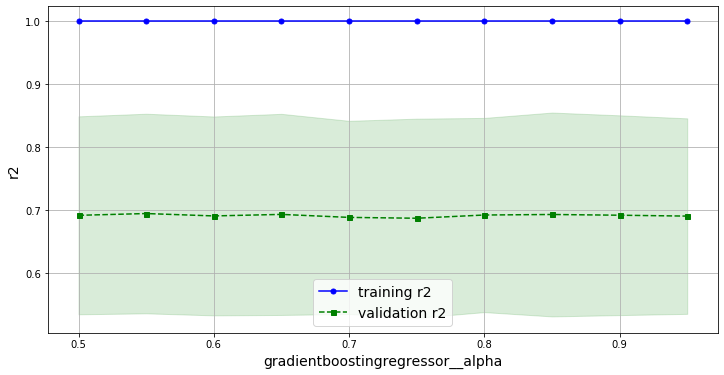

In [54]:
#param_name  = 'gradientboostingregressor__max_depth'
#param_range = np.arange(1,15,1)

param_name  = 'gradientboostingregressor__alpha'
param_range = np.arange(0.50, 1.0, .05)

scoring='r2' # for regression problems

train_scores, val_scores = validation_curve(estimator=pipe, X=X_train, y=y_train, 
                                            cv=10,    # choose 5, if 10 is too slow
                                            param_name=param_name, 
                                            param_range=param_range,
                                            scoring=scoring
                                           )

trn_mean = np.mean(train_scores, axis=1)
trn_std  = np.std (train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std  = np.std (val_scores, axis=1)

plt.figure(figsize=(12,6))
plt.plot(param_range, trn_mean, 'bo-',  markersize=5, label='training '+ scoring)
plt.fill_between(param_range, trn_mean+trn_std, trn_mean-trn_std, alpha=0.25, color='blue')

plt.plot(param_range, val_mean, 'gs--', markersize=5, label='validation '+ scoring)
plt.fill_between(param_range, val_mean+val_std, val_mean-val_std, alpha=0.15, color='green')
plt.grid()

plt.legend(loc='lower center', fontsize=14)
plt.xlabel(param_name, fontsize=14)
plt.ylabel(scoring, fontsize=14)
plt.show()

In [55]:
params = {'gradientboostingregressor__max_depth': np.arange(1, 15, 1),
          'gradientboostingregressor__alpha': np.arange(0.1, 1.0, .05),
         }

scoring='r2' # for regression problems

gs = GridSearchCV(estimator=pipe, 
                  cv=10,
                  param_grid=params,
                  scoring=scoring
                 )
gs.fit(X_train, y_train)

print('Best parameters:', gs.best_params_, 
      '\nValidation %s: %.6f +/- %.6f' % (scoring, gs.best_score_, gs.cv_results_['std_test_score'][gs.best_index_]),
      '\n      Test %s: %.6f\n' % (scoring, gs.best_estimator_.score(X_test,y_test)))

pipe = gs.best_estimator_    # This is the FINAL model (already retrained by GridSearchCV)


print('Best Model:')

print('Training score:', pipe.score(X_train,y_train))
print('    Test score:', pipe.score(X_test,y_test))

Best parameters: {'gradientboostingregressor__alpha': 0.7500000000000002, 'gradientboostingregressor__max_depth': 4} 
Validation r2: 0.716022 +/- 0.155679 
      Test r2: 0.503811

Best Model:
Training score: 0.9999915540192612
    Test score: 0.5038108541725412


C:\Users\Trader\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Here we see that the optimal hyperparameters for this model are: Alpha : 0.55 and Max Depth : 3.
Based on the structure of the learning curves, it appears that neither more data nor more features would improve performance.

In [56]:
print(X.columns)

Index(['Australia and New Zealand', 'Central and Eastern Europe',
       'Eastern Asia', 'Latin America and Caribbean',
       'Middle East and Northern Africa', 'North America', 'Southeastern Asia',
       'Southern Asia', 'Sub-Saharan Africa', 'Western Europe',
       'Black Market Size', 'Currency Freedom', 'Govt Enterprise',
       'Economic Freedom', 'Govt Cons', 'Transfers', 'Taxes',
       'Judicial Independence', 'Judicial Fairness', 'Property Protection',
       'Military Interference', 'Legal Integrity', 'Contract Strength',
       'Property Freedom', 'Police Reliability', 'Crime Costs',
       'Gender Adjustment', 'Money Supply', 'Inflation STDV', 'Inflation',
       'Tariffs', 'Trade Barriers', 'Capital Controls', 'Credit Regulation',
       'Labor Regulation', 'Business Regulation', 'GDP per Capita', 'Family',
       'Life Expectancy', 'Freedom', 'Govt Corruption', 'Generosity'],
      dtype='object')


In [57]:
feature_names = [i for i in X.columns]

In [58]:
feature_names

['Australia and New Zealand',
 'Central and Eastern Europe',
 'Eastern Asia',
 'Latin America and Caribbean',
 'Middle East and Northern Africa',
 'North America',
 'Southeastern Asia',
 'Southern Asia',
 'Sub-Saharan Africa',
 'Western Europe',
 'Black Market Size',
 'Currency Freedom',
 'Govt Enterprise',
 'Economic Freedom',
 'Govt Cons',
 'Transfers',
 'Taxes',
 'Judicial Independence',
 'Judicial Fairness',
 'Property Protection',
 'Military Interference',
 'Legal Integrity',
 'Contract Strength',
 'Property Freedom',
 'Police Reliability',
 'Crime Costs',
 'Gender Adjustment',
 'Money Supply',
 'Inflation STDV',
 'Inflation',
 'Tariffs',
 'Trade Barriers',
 'Capital Controls',
 'Credit Regulation',
 'Labor Regulation',
 'Business Regulation',
 'GDP per Capita',
 'Family',
 'Life Expectancy',
 'Freedom',
 'Govt Corruption',
 'Generosity']

In [59]:
print(pipe.named_steps.gradientboostingregressor.feature_importances_)

[0.         0.00375574 0.00467242 0.00084046 0.00292328 0.00023558 0.00042577 0.0000231  0.00002548 0.         0.         0.00093198 0.00151793 0.00004259 0.00002514 0.         0.00000002 0.00000822
 0.         0.00000012 0.00003324 0.0028718  0.00103692 0.00118242 0.00515963 0.00389054 0.02275227 0.0213747  0.00282968 0.01055069 0.00172164 0.00167576 0.00411353 0.00093484 0.00256968 0.00098675
 0.00821098 0.00520251 0.01389914 0.01547106 0.00603087 0.00064833 0.00206032 0.01078074 0.00100219 0.65405308 0.04576552 0.00944    0.07527423 0.04921719 0.00383189]


In [60]:
results = dict(zip(feature_names, pipe.named_steps.gradientboostingregressor.feature_importances_[9::]))

In [61]:
for k,v in results.items():
    print(k,(v*1000).round(4))

Australia and New Zealand 0.0
Central and Eastern Europe 0.0
Eastern Asia 0.932
Latin America and Caribbean 1.5179
Middle East and Northern Africa 0.0426
North America 0.0251
Southeastern Asia 0.0
Southern Asia 0.0
Sub-Saharan Africa 0.0082
Western Europe 0.0
Black Market Size 0.0001
Currency Freedom 0.0332
Govt Enterprise 2.8718
Economic Freedom 1.0369
Govt Cons 1.1824
Transfers 5.1596
Taxes 3.8905
Judicial Independence 22.7523
Judicial Fairness 21.3747
Property Protection 2.8297
Military Interference 10.5507
Legal Integrity 1.7216
Contract Strength 1.6758
Property Freedom 4.1135
Police Reliability 0.9348
Crime Costs 2.5697
Gender Adjustment 0.9867
Money Supply 8.211
Inflation STDV 5.2025
Inflation 13.8991
Tariffs 15.4711
Trade Barriers 6.0309
Capital Controls 0.6483
Credit Regulation 2.0603
Labor Regulation 10.7807
Business Regulation 1.0022
GDP per Capita 654.0531
Family 45.7655
Life Expectancy 9.44
Freedom 75.2742
Govt Corruption 49.2172
Generosity 3.8319


In [62]:
len(feature_names)

42

In [63]:
import random

In [72]:
sample = [random.randrange(0, 100, 1)/100 for i in range(51)]

In [73]:
sample = np.asarray(sample).reshape(1,-1)

In [74]:
pipe.named_steps.gradientboostingregressor.predict(sample)

array([6.35762143])